In [2]:
import os.path as osp
import numpy as np
import numpy.linalg as npla
np.set_printoptions(6, suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    'font.size': 14,
})

import utils

def load_pred_poses(filename):
    data = np.loadtxt(filename)
    poses = []
    for v in data:
        T_ms = np.eye(4)
        T_ms[:3, :] = v.reshape(3, 4)
        poses.append(T_ms)
    return np.array(poses)

def load_gt_poses(filename):
    data = np.loadtxt(filename)
    poses = []
    for v in data:
        T_ms = np.eye(4)
        T_ms[:3, :] = v.reshape(3, 4)
        poses.append(T_ms)
    return np.array(poses)


def plot_pred_poses(ax, filename, gt_poses, label):
    pred_poses = load_pred_poses(filename)
    T_gt_pred = gt_poses[0] @ npla.inv(pred_poses[0])
    pred_poses = T_gt_pred @ pred_poses
    ax.plot(pred_poses[:, 0, 3], pred_poses[:, 2, 3], label=label)


gt_path = '/media/yuchen/T7/ASRL/data/kitti_raw'
pred_path = '/home/yuchen/ASRL/temp/doppler_odometry/kitti_raw'
sequences = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

In [23]:
### evaluate odometry
sequence = sequences[10]

print(f"                    KITTI metric:     t(2d)  r(2d)    t      r          RPE:     t(2d)    r(2d)      t      r")
for sequence in sequences:
  if sequence == '03': continue

  print(f"{sequence}:")
  gt_poses = load_gt_poses(osp.join(gt_path, sequence, sequence+'.txt'))

  ##
  pred_file = 'elastic_0808_1'
  pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

  ##
  pred_file = 'steam_0808_1'
  pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
  # kitti metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_kitti(gt_poses, pred_poses)
  print(f"{pred_file:<35} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f}", end = '')
  # rpe metric
  t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry_rpe(gt_poses, pred_poses)
  print(f"            & {t_err_2d:.4f} & {r_err_2d:.4f} & {t_err:.4f} & {r_err:.4f} \\\\")

                    KITTI metric:     t(2d)  r(2d)    t      r          RPE:     t(2d)    r(2d)      t      r
00:
elastic_0808_1                      & 0.39 & 0.0005 & 0.50 & 0.0018            & 0.0226 & 0.0008 & 0.0299 & 0.0015 \\
steam_0808_1                        & 0.39 & 0.0003 & 0.49 & 0.0017            & 0.0196 & 0.0008 & 0.0265 & 0.0014 \\
01:
elastic_0808_1                      & 0.66 & 0.0004 & 0.74 & 0.0009            & 0.0277 & 0.0003 & 0.0400 & 0.0009 \\
steam_0808_1                        & 0.60 & 0.0002 & 0.65 & 0.0010            & 0.0249 & 0.0003 & 0.0386 & 0.0009 \\
02:
elastic_0808_1                      & 0.45 & 0.0005 & 0.52 & 0.0012            & 0.0230 & 0.0008 & 0.0312 & 0.0013 \\
steam_0808_1                        & 0.43 & 0.0003 & 0.50 & 0.0012            & 0.0202 & 0.0007 & 0.0332 & 0.0012 \\
04:
elastic_0808_1                      & 0.34 & 0.0002 & 0.39 & 0.0005            & 0.0141 & 0.0003 & 0.0491 & 0.0004 \\
steam_0808_1                        & 0.31 & 0.0

Average error: [-0.000388 -0.000366 -0.000459  0.000001  0.000007  0.      ] Average abs error: [0.010408 0.00688  0.011096 0.000446 0.000356 0.000837]
Average error: [-0.000117 -0.000341 -0.000582  0.000001  0.000011  0.000001] Average abs error: [0.006493 0.004864 0.005871 0.000577 0.000237 0.000796]


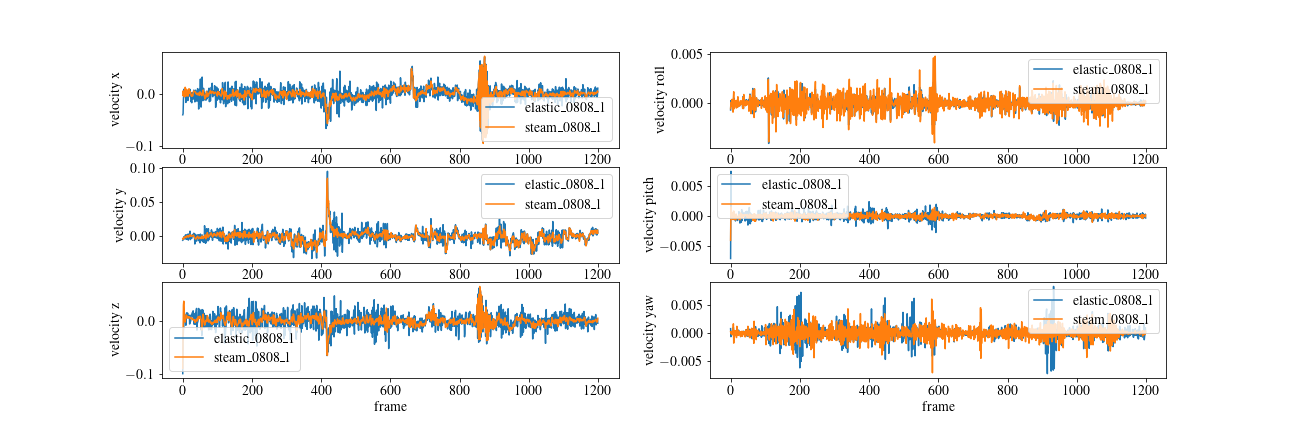

In [3]:
### plot local error
sequence = sequences[10]

fig, ax = plt.subplots(3, 2, figsize=(18, 6))

error_file = 'elastic_0808_1'
utils.plot_error(ax, osp.join(pred_path, error_file, sequence+'_eval.txt'), label=error_file)
# error = np.loadtxt(osp.join(pred_path, error_file, sequence+'_eval.txt'))
# print(error.shape, "mean: ", np.mean(error, axis=0), "abs mean: ", np.mean(np.abs(error), axis=0))
# ax.plot(error[:, 0], label=error_file)

error_file = 'steam_0808_1'
utils.plot_error(ax, osp.join(pred_path, error_file, sequence+'_eval.txt'), label=error_file)
# error = np.loadtxt(osp.join(pred_path, error_file, sequence+'_eval.txt'))
# print(error.shape, "mean: ", np.mean(error, axis=0), "abs mean: ", np.mean(np.abs(error), axis=0))
# ax.plot(error, label=error_file)

utils.add_legend(ax, xlabel='frame')
# ax.set_xlabel('frame')
# ax.legend()

plt.show()

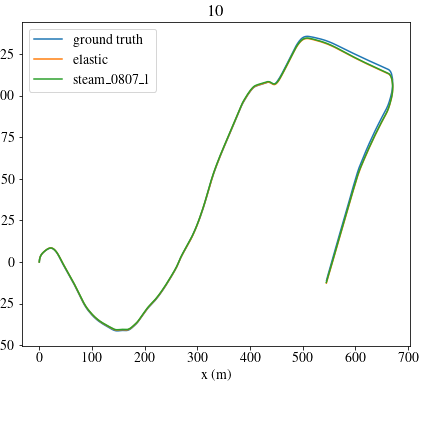

In [6]:
### plot path in 2d
sequence = sequences[10]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95, wspace=0.3, hspace=0.3)

gt_poses = load_gt_poses(osp.join(gt_path, sequence, sequence+'.txt'))
ax.plot(gt_poses[:, 0, 3], gt_poses[:, 2, 3], label='ground truth')

pred_file = 'elastic'
plot_pred_poses(ax, osp.join(pred_path, pred_file, sequence+'_poses.txt'), gt_poses, pred_file)

pred_file = 'steam_0807_1'
plot_pred_poses(ax, osp.join(pred_path, pred_file, sequence+'_poses.txt'), gt_poses, pred_file)

ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title(sequence)
ax.legend()

plt.show()